In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year

In [4]:
original_df.date = pd.to_datetime(original_df.date)

In [5]:
original_df.head(20)

,customer_id,amount,date,month,year
0,760,25.0,2009-11-06,11,2009
1,860,50.0,2012-09-28,9,2012
2,1200,100.0,2005-10-25,10,2005
3,1420,50.0,2009-07-09,7,2009
4,1940,70.0,2013-01-25,1,2013
5,1960,40.0,2013-10-29,10,2013
6,2620,30.0,2006-03-09,3,2006
7,3050,50.0,2007-04-12,4,2007
8,3120,150.0,2006-11-08,11,2006
9,3260,45.0,2010-10-20,10,2010


In [6]:
sorted_by_date = original_df.sort_values(by=['date'])

In [7]:
sorted_by_date

,customer_id,amount,date,month,year
17480,8150,20.00,2005-01-02,1,2005
24329,10210,20.00,2005-01-02,1,2005
7293,5540,100.00,2005-01-02,1,2005
17048,14140,20.00,2005-01-04,1,2005
34629,5640,30.00,2005-01-04,1,2005
45461,11740,30.00,2005-01-06,1,2005
41614,10280,30.00,2005-01-06,1,2005
34344,14150,210.00,2005-01-06,1,2005
33667,9480,30.00,2005-01-07,1,2005
48013,14170,100.00,2005-01-07,1,2005


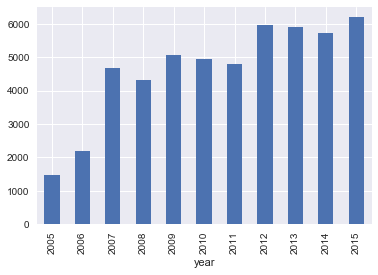

In [8]:
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar')

In [9]:
# total number of unique customer_id's
len(original_df['customer_id'].unique())

18417

In [12]:
year_2005 = sorted_by_date[sorted_by_date["date"].isin(pd.date_range("2005-01-01", "2005-12-31"))]
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-01-01", "2005-01-31")), '1'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-02-01", "2005-02-28")), '2'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-03-01", "2005-03-31")), '3'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-04-01", "2005-04-30")), '4'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-05-01", "2005-05-31")), '5'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-06-01", "2005-06-30")), '6'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-07-01", "2005-07-31")), '7'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-08-01", "2005-08-31")), '8'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-09-01", "2005-09-30")), '9'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-10-01", "2005-10-31")), '10'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-11-01", "2005-11-30")), '11'] = 1
# year_2005.loc[sorted_by_date['date'].isin(pd.date_range("2005-12-01", "2005-12-31")), '12'] = 1

In [21]:
df = year_2005.groupby('customer_id', sort=True)

In [22]:
df.head()

,customer_id,amount,date,month,year
17480,8150,20.00,2005-01-02,1,2005
24329,10210,20.00,2005-01-02,1,2005
7293,5540,100.00,2005-01-02,1,2005
17048,14140,20.00,2005-01-04,1,2005
34629,5640,30.00,2005-01-04,1,2005
45461,11740,30.00,2005-01-06,1,2005
41614,10280,30.00,2005-01-06,1,2005
34344,14150,210.00,2005-01-06,1,2005
33667,9480,30.00,2005-01-07,1,2005
48013,14170,100.00,2005-01-07,1,2005


In [35]:
df.sort_values("customer_id")

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method